# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


None

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


,date,Page_views,Weekdays,Weekdays_name,Month,Year
42,2016-06-20,28508,0,Monday,June,2016
43,2016-06-21,26805,1,Tuesday,June,2016
51,2016-06-29,27734,2,Wednesday,June,2016
52,2016-06-30,26696,3,Thursday,June,2016
53,2016-07-01,28372,4,Friday,July,2016
...,...,...,...,...,...,...
1294,2019-11-24,138875,6,Sunday,November,2019
1299,2019-11-29,171584,4,Friday,November,2019
1300,2019-11-30,141161,5,Saturday,November,2019
1301,2019-12-01,142918,6,Sunday,December,2019


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 42 to 1303
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1173 non-null   datetime64[ns]
 1   Page_views     1173 non-null   int64         
 2   Weekdays       1173 non-null   int64         
 3   Weekdays_name  1173 non-null   object        
 4   Month          1173 non-null   object        
 5   Year           1173 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 64.1+ KB
None


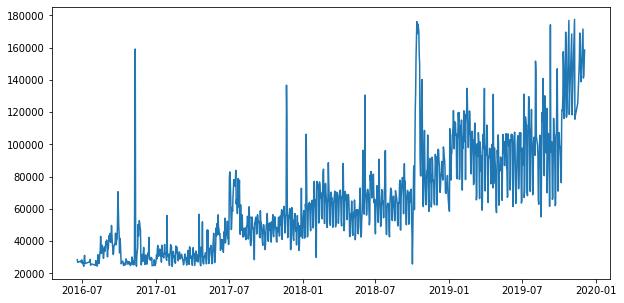

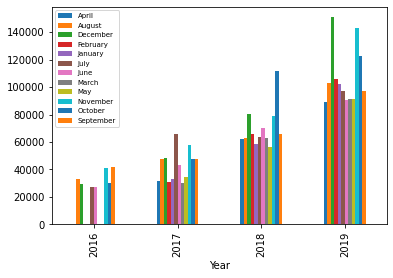

<Figure size 720x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


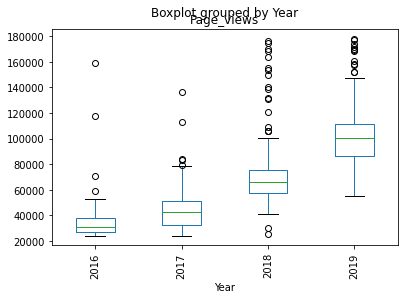

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


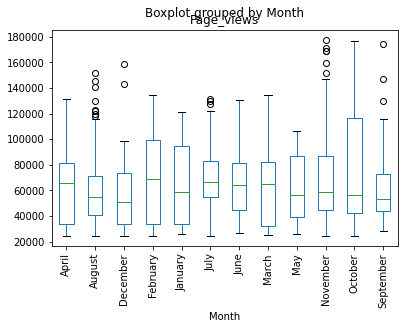

Year
2016     34673.2
2017     43437.1
2018     69569.2
2019    100744.5
Name: Page_views, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df_views=pd.read_csv(url)

def visualize_pageViews_dataframe(df):
  display(df.head())
  display(df.info())
  display(df.describe())

visualize_pageViews_dataframe(df_views)


def get_weekdays(df):
  weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
  return weekDays[df['Weekdays']]


def clean_df(df):
  df.rename(columns={"value": "Page_views"},inplace=True)
  df['date']= pd.to_datetime(df['date'])
  df['Weekdays']=df['date'].dt.weekday
  df["Weekdays_name"]=df['Weekdays'] 
  df["Weekdays_name"]= df.apply(get_weekdays, axis=1)
  df['Month'] = df['date'].dt.month_name()
  df['Year'] = df['date'].dt.year
#There is no null data, but if there was null data
  df.dropna()
#Ignore outliers
  top_outlier= df['Page_views'].quantile(0.975) 
  bottom_outlier= df['Page_views'].quantile(0.075)
  df_clean=df[(df['Page_views'] >bottom_outlier) & (df['Page_views'] <top_outlier)]
  return df_clean

df_Page_views_clean=clean_df(df_views)
display(df_Page_views_clean)
print(df_Page_views_clean.info())

def create_bar_chart_views_per_day(df):
  plt.figure(figsize=(10,5)) 
  display(plt.plot(df['date'],df['Page_views']))

create_bar_chart_views_per_day(df_Page_views_clean)  

def create_bar_chart_by_year_and_month(df):
  #createpivot table
  pivot_table_df=pd.pivot_table( df, values = 'Page_views', index = 'Year', columns='Month', aggfunc = np.mean)
  pivot_table_df.plot(kind = 'bar')
  #plot the pivot table
  plt.legend(loc=2, prop={'size': 7})
  plt.figure(figsize=(10,5))     
  plt.show()
create_bar_chart_by_year_and_month(df_Page_views_clean)

def create_box_plot(df,X_var,Y_var):
  box_plot=df.boxplot(by =X_var, column =[Y_var], grid = False)
  plt.xticks(rotation=90)
  plt.show()

create_box_plot(df_Page_views_clean,"Year","Page_views")
create_box_plot(df_Page_views_clean,"Month","Page_views")

#average views per year
mean_yr=df_Page_views_clean.groupby("Year")["Page_views"].mean()
print(round(mean_yr,1))


###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


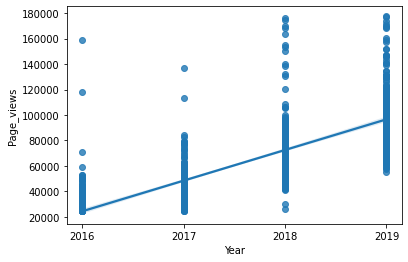

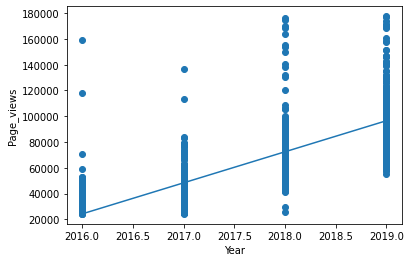

-48567162.39457452

24102.880151732556

The page views predicted in  2030 are 361684.3134425655


In [ ]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def make_Lregression_plot(df,variable1, variable2):
  x=df[variable1]
  y=df[variable2] 
  #Create a scatterplot using seaborn
  chart=sns.regplot(x=x, y=y)
  chart.xaxis.set_major_locator(ticker.MultipleLocator(1))
  chart.set_xlabel(variable1)
  chart.set_ylabel(variable2)
  plt.show()
make_Lregression_plot(df_Page_views_clean,"Year",'Page_views')

def create_line_Best_fit(df,variable1, variable2):
  x=df[variable1]
  y=df[variable2] 
  #Create a scatterplot using matplotlib
  plt.xlabel(variable1)
  plt.ylabel(variable2)
  plt.scatter(x,y)
  regression = linregress(x,y)
  slope = regression.slope
  intercept = regression.intercept
  rvalue=regression.rvalue  
  plt.plot(x, slope*x + intercept)
  plt.show()
  return intercept, slope

intercept, slope=create_line_Best_fit (df_Page_views_clean,"Year",'Page_views') 

#predict the page views in the year 2020, 2025 and 2030
def predict_trends(intercept, slope,yr):
   predicted_views=intercept+slope* yr
   return predicted_views,yr
views_predicted,year=predict_trends(intercept, slope,2030)
print("The page views predicted in ",year, "are",views_predicted)


# Reflect
There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.The matplotlib and seaborn libraries have a wide range of visualisation functions for data sets and mathematical equations and the most common charts we used are:

• bar charts

• pie charts

• line plots

• box plots

• scatter plots

• histogram

Visualization is a very powerful tool and helps understanding and analysing the data better.

This project shows my ability to:

• look at a dataset (header, info and describe)

• clean a data, add columns and attributes

• create functions that are called within other functions

c• reate a pivot table 

create different tipes of chart with some statistics
# What caused the biggest problems? 
One of the problems I have had with the seaborn plot, is that the years have got a decimal point and I solved it using matplotlib.ticker

I also spent quite a lto of time trying to convert the numbers associated to the dt.weekday attribute (that returns the day of the week) to the weekdays name.
